# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

parks = pd.read_csv("CleanParks.csv")
parks = parks.drop(columns=['Unnamed: 0'])

species = pd.read_csv("CleanSpecies.csv")
species = species.drop(columns=['Unnamed: 0'])

combo = pd.merge(parks, species, on="Park_Name", how="outer", indicator=True)

In [2]:
print(combo.info())
print(combo.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119197 entries, 0 to 119196
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Park_Code            119197 non-null  object  
 1   Park_Name            119197 non-null  object  
 2   State                119197 non-null  object  
 3   Acres                119197 non-null  int64   
 4   Latitude             119197 non-null  float64 
 5   Longitude            119197 non-null  float64 
 6   Species_ID           119197 non-null  object  
 7   Category             119197 non-null  object  
 8   Order                119197 non-null  object  
 9   Family               119197 non-null  object  
 10  Scientific_Name      119197 non-null  object  
 11  Common_Names         119197 non-null  object  
 12  Record_Status        119197 non-null  object  
 13  Occurrence           119197 non-null  object  
 14  Nativeness           119197 non-null  object  
 15  

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/var/folders/cv/mdwq80xn6p9c63w11qqrqsqw0000gn/T/ipykernel_99535/3741967461.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combo.corr(), cmap="YlGnBu", annot = True)


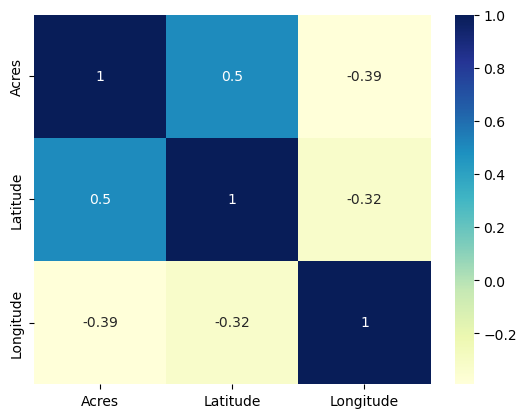

In [3]:
sns.heatmap(combo.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [4]:
# Assigning X and Y variables

X = combo['Latitude']
Y = combo['Acres']

In [5]:
# Creating the train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

93155      112512
55410       86416
114921    2219791
56212       29094
62617        5550
           ...   
93516      112512
59344      323431
5836       801163
61511      323431
56171       29094
Name: Acres, Length: 89397, dtype: int64

In [6]:
# Building the model. Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS' regression function
lr = sm.OLS(Y_train, X_train_sm).fit()

# Printing the parameters and summary
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Acres   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                 2.940e+04
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:11:07   Log-Likelihood:            -1.3918e+06
No. Observations:               89397   AIC:                         2.784e+06
Df Residuals:                   89395   BIC:                         2.784e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.344e+06   1.97e+04   -119.165      0.000   -2.38e+06   -2.31e+06
Latitude    8.162e+04    476.028    171.450      0.000    8.07e+04    8.25e+04
==============================================================================
Omnibus:                    39651.846   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           174165.100
Skew:                           2.218   Prob(JB):                         0.00
Kurtosis:                       8.204   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

In [7]:
# Predicting Y_value using training data of X
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the Y_train data and predicted Y_data
res = (Y_train - Y_train_pred)

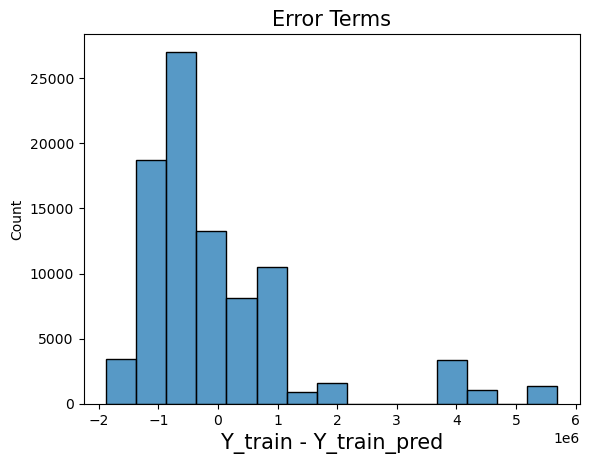

In [8]:
# Plotting data

fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 

0.247

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 

I do not think a linear regressional model was the best type of predictive analysis for my dataset. The vast majority of my data was qualitative (e.g., Park Name, Species Name) and the numeric data I did have is more or a dimension than a measure (i.e., latitude, longitude). If I had additional time I would recreate some of the calculations I used in Tableau to add quantitative information to my dataset, such as the number of species per park. In the absence of additional quantitative data a linear regression is not appropriate for my dataset. 

3. Was your plot of the error terms a bell curve? 

No. The plot is heavily skewed right. 